In [1]:
import pyvista as pv
import os
import numpy as np
import matplotlib.pyplot as plt
import logging

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

In [2]:
print(pv.Report())


--------------------------------------------------------------------------------
  Date: Wed Nov 13 15:45:13 2024 CET

                OS : Linux (Ubuntu 22.04)
            CPU(s) : 32
           Machine : x86_64
      Architecture : 64bit
               RAM : 62.4 GiB
       Environment : Jupyter
       File system : ext4
        GPU Vendor : Microsoft Corporation
      GPU Renderer : D3D12 (AMD Radeon(TM) Graphics)
       GPU Version : 4.2 (Core Profile) Mesa 23.2.1-1ubuntu3.1~22.04.2
  MathText Support : True

  Python 3.12.4 (main, Jun  8 2024, 18:29:57) [GCC 11.4.0]

           pyvista : 0.44.1
               vtk : 9.3.1
             numpy : 2.1.3
        matplotlib : 3.9.2
            scooby : 0.10.0
             pooch : 1.8.2
            pillow : 11.0.0
           IPython : 8.29.0
      nest_asyncio : 1.6.0
--------------------------------------------------------------------------------


In [3]:
vtu_files = [f  for f in os.listdir(os.path.join(os.curdir,'results')) if f.endswith('.vtu')]
vtu_files.sort()
print(f'{len(vtu_files)} vtu files found')

100 vtu files found


In [4]:
mesh_t0 = pv.read(os.path.join(os.curdir,'results', vtu_files[0]))

2024-11-13 15:45:14.010 (   1.549s) [    7F3A71D44000]        vtkRenderer.cxx:1161  WARN| vtkOpenGLRenderer (0x3068d60): Resetting view-up since view plane normal is parallel
/home/mjfwest/elmerfemtests/elmer-elmag/.venv/lib/python3.12/site-packages/pyvista/jupyter/notebook.py:37: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


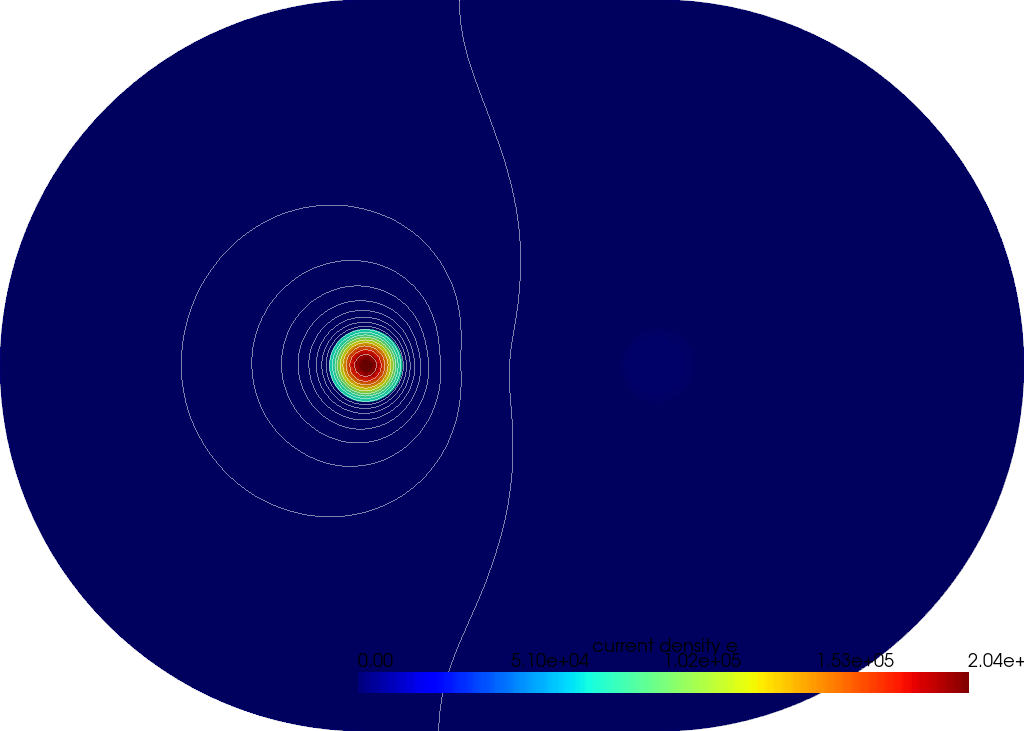

In [5]:
p = pv.Plotter()
p.add_mesh(mesh_t0, scalars="current density e", show_edges=False, cmap='jet')
p.add_mesh(mesh_t0.contour(isosurfaces=20, scalars='a', method='contour'),color='white',point_size=1, show_edges=False, opacity=0.5)
p.set_viewup([0,0,1])
p.camera.zoom('tight')
p.show()

In [6]:
WIRE_1_ID = 1
WIRE_2_ID = 2

wire_1 = mesh_t0.threshold([WIRE_1_ID - 0.1, WIRE_1_ID + 0.1], scalars="GeometryIds")

2024-11-13 15:45:14.243 (   1.782s) [    7F3A71D44000]        vtkRenderer.cxx:1161  WARN| vtkOpenGLRenderer (0x5190970): Resetting view-up since view plane normal is parallel
/home/mjfwest/elmerfemtests/elmer-elmag/.venv/lib/python3.12/site-packages/pyvista/jupyter/notebook.py:37: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


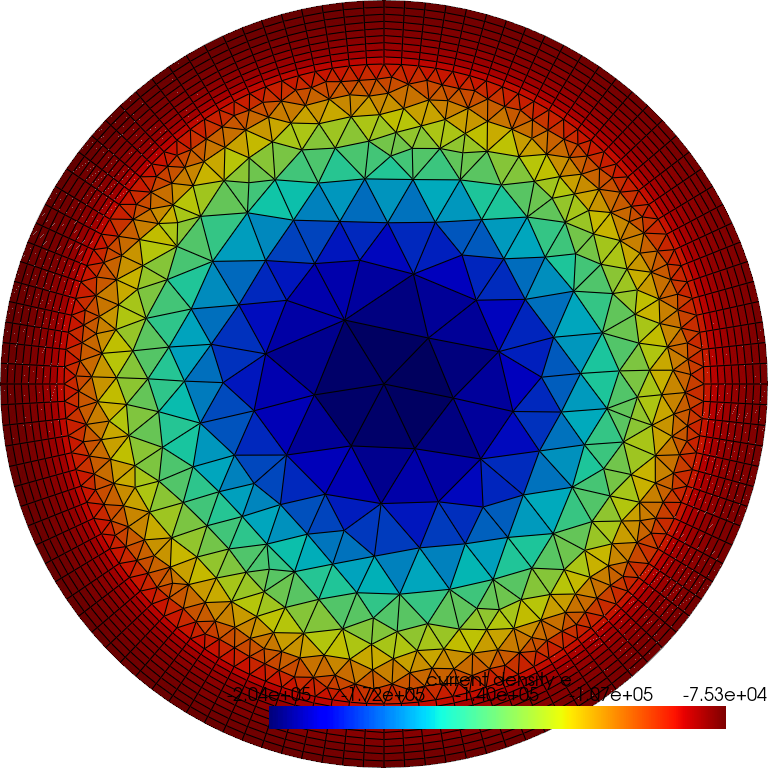

In [7]:
p = pv.Plotter()
p.add_mesh(wire_1, scalars="current density e", component=2, show_edges=True, cmap='jet')
p.set_viewup([0,0,1])
p.camera.zoom('tight')
p.show()

In [ ]:
wire_currrent = np.empty((len(vtu_files), 2))
for idx, vtu_file in enumerate(vtu_files):
    logger.info(f'Processing {vtu_file}')
    mesh = pv.read(os.path.join(os.curdir,'results', vtu_file))
    for wire in [WIRE_1_ID, WIRE_2_ID]:
        wire_mesh = mesh.threshold([wire - 0.1, wire + 0.1], scalars="GeometryIds")
        wire_mesh_int = wire_mesh.integrate_data()
        wire_currrent[idx, wire-1] = wire_mesh_int['current density e'][0, 2] # 2 is the z component

INFO:__main__:Processing s_t0001.vtu


TypeError: unsupported operand type(s) for -: 'UnstructuredGrid' and 'int'

In [ ]:
from matplotlib import pyplot as plt
plt.plot(wire_currrent)

In [ ]:
wire_1_int['current density e'][0,2]